In [ ]:
import pandas as pd


file_path = '/content/Spotify Million Song Dataset_exported.csv'  


try:
    spotify_df = pd.read_csv(file_path, encoding='utf-8')
    print("Dataset loaded successfully!")
except pd.errors.ParserError as e:
    print("Error loading dataset:", e)
    print("Attempting to read with error_bad_lines=False...")
  
    try:
        spotify_df = pd.read_csv(file_path, error_bad_lines=False)
        print("Dataset loaded successfully with error_bad_lines=False!")
    except pd.errors.ParserError as e:
        print("Error loading dataset even with error_bad_lines=False:", e)

Dataset loaded successfully!


In [ ]:

print(spotify_df.head())


print(spotify_df.info())

print(spotify_df.describe())

  artist                   song                                        link  \
0   ABBA  Ahe's My Kind Of Girl  /a/abba/ahes+my+kind+of+girl_20598417.html   
1   ABBA       Andante, Andante       /a/abba/andante+andante_20002708.html   
2   ABBA         As Good As New        /a/abba/as+good+as+new_20003033.html   
3   ABBA                   Bang                  /a/abba/bang_20598415.html   
4   ABBA       Bang-A-Boomerang      /a/abba/bang+a+boomerang_20002668.html   

                                                text  
0  Look at her face, it's a wonderful face  \nAnd...  
1  Take it easy with me, please  \nTouch me gentl...  
2  I'll never know why I had to go  \nWhy I had t...  
3  Making somebody happy is a question of give an...  
4  Making somebody happy is a question of give an...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57

In [ ]:

spotify_df.dropna(inplace=True)


spotify_df.drop_duplicates(inplace=True)


In [ ]:
!pip uninstall -y jax jaxlib
!pip install --upgrade tensorflow


Found existing installation: jax 0.4.26
Uninstalling jax-0.4.26:
  Successfully uninstalled jax-0.4.26
Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
  Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

spotify_df['cleaned_lyrics'] = spotify_df['text'].astype(str).apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

spotify_df.to_csv('spotify_dataset_tokenized.csv', index=False)

from google.colab import files
files.download('spotify_dataset_tokenized.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

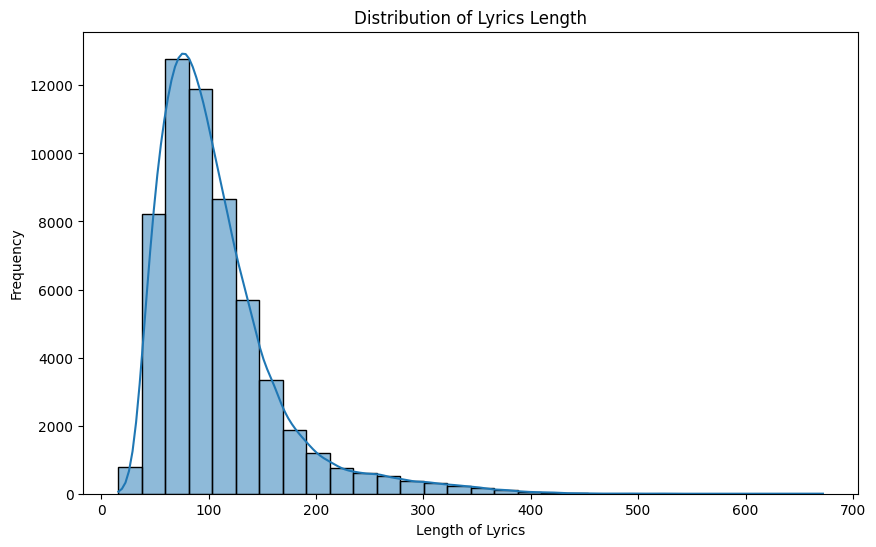

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['cleaned_lyrics'].apply(len), bins=30, kde=True)
plt.title('Distribution of Lyrics Length')
plt.xlabel('Length of Lyrics')
plt.ylabel('Frequency')
plt.show()


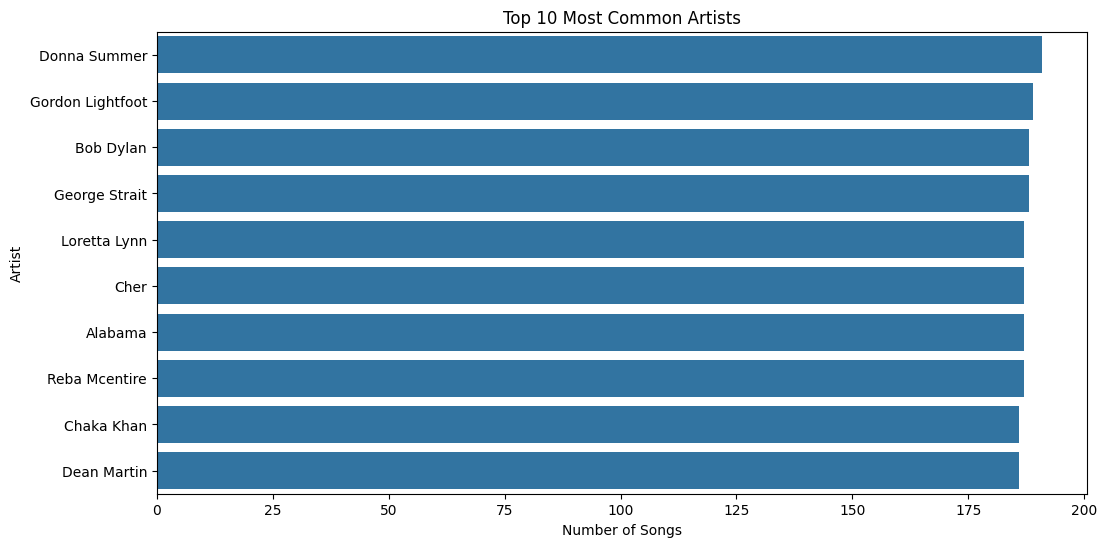

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


plt.figure(figsize=(12, 6))
sns.countplot(y='artist', data=spotify_df, order=spotify_df['artist'].value_counts().index[:10])
plt.title('Top 10 Most Common Artists')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()


# **Training**

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np


data = pd.read_csv('/content/Spotify Million Song Dataset_exported.csv')
texts = data['text']  


most_songs_artist = data['artist'].value_counts().idxmax()


filtered_data = data[data['artist'] == most_songs_artist]


tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(filtered_data['text'])
sequences = tokenizer.texts_to_sequences(filtered_data['text'])


input_sequences = []
for seq in sequences:
    for i in range(1, len(seq)):
        n_gram_sequence = seq[:i+1]
        input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

targets = input_sequences[:, -1]
input_sequences = input_sequences[:, :-1]


X_train, X_test, y_train, y_test = train_test_split(input_sequences, targets, test_size=0.1, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from collections import Counter


vocab_size = len(tokenizer.word_index) + 1

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=256, input_length=max_sequence_len-1),
    LSTM(256, return_sequences=True),
    Dropout(0.5),
    LSTM(256),
    Dense(vocab_size, activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(vocab_size)
max_index = np.max(X_train)
print(f"Max index in X_train: {max_index}")


2834
Max index in X_train: 2833


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import os


from google.colab import drive
drive.mount('/content/drive')


checkpoint_dir = '/content/drive/MyDrive/Checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_filepath = os.path.join(checkpoint_dir, 'model_checkpoint.h5')


early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint(checkpoint_filepath, save_best_only=True, monitor='val_loss', mode='min', save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)


initial_epoch = 0
if os.path.exists(checkpoint_filepath):
    print("Checkpoint found. Loading model weights.")
    model.load_weights(checkpoint_filepath)


history = model.fit(
    X_train, y_train,
    epochs=5,  
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    initial_epoch=initial_epoch
)


Mounted at /content/drive
Epoch 1/5
310/310 [==============================] - 4164s 13s/step - loss: 6.1966 - accuracy: 0.0352 - val_loss: 5.9527 - val_accuracy: 0.0355 - lr: 0.0010
Epoch 2/5
310/310 [==============================] - 4155s 13s/step - loss: 5.8119 - accuracy: 0.0527 - val_loss: 5.6915 - val_accuracy: 0.0671 - lr: 0.0010
Epoch 3/5
310/310 [==============================] - 4228s 14s/step - loss: 5.5148 - accuracy: 0.0703 - val_loss: 5.5194 - val_accuracy: 0.0825 - lr: 0.0010
Epoch 4/5
310/310 [==============================] - 4227s 14s/step - loss: 5.2800 - accuracy: 0.0878 - val_loss: 5.3736 - val_accuracy: 0.1041 - lr: 0.0010
Epoch 5/5
310/310 [==============================] - 4233s 14s/step - loss: 5.0495 - accuracy: 0.1099 - val_loss: 5.2321 - val_accuracy: 0.1230 - lr: 0.0010


In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

138/138 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 8.2875e-05 - loss: 7.9496
Test Loss: 7.949555397033691
Test Accuracy: 0.00022732438810635358


**After Training**

In [ ]:
def generate_text(seed_text, next_words, model, tokenizer, max_sequence_len):
    words_added = 0
    current_text = seed_text
    while words_added < next_words:
        token_list = tokenizer.texts_to_sequences([current_text])[0]
        token_list_padded = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        predictions = model.predict(token_list_padded, verbose=0).squeeze()
        predicted_index = np.argmax(predictions)
        output_word = tokenizer.index_word.get(predicted_index + 1, None)  
        if output_word and output_word.strip():
            current_text += ' ' + output_word.strip()
            words_added += 1
        else:
            continue  

    return current_text


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model = load_model('/content/Yousef_trained_model.h5')
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 497, 256)          725504    
                                                                 
 lstm (LSTM)                 (None, 497, 256)          525312    
                                                                 
 dropout (Dropout)           (None, 497, 256)          0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 2834)              728338    
                                                                 
Total params: 2504466 (9.55 MB)
Trainable params: 2504466 (9.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [35]:
seed_text = "He's got a second side he's got sixth sense"
generated_text = generate_text(seed_text, 10, model, tokenizer, max_sequence_len)
print(generated_text)

He's got a second side he's got sixth sense fails fails david david steal steal prize feelin' feelin' losing
